In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import skvideo.io
import skimage.io
from skimage import color,exposure
import skvideo.datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def frameCountError(reader,n):
    # get total number of frames in the video
    T = reader.getShape()[0]
    # give error if n>T
    if n>T:
        reader.close()
        raise ValueError("n should be less than or equal to %i, the total number frames in the video"%T)

# Algorithm 2
![](Algo2.svg)

In [13]:
def getChange(frame,plane):
    """
        this gives 3 outputs regarding the specified plane of rFrame and frame
        inc: 
        dec:
        incdec:
    """
    # this is the transformation done:
    rFrame = np.rot90(frame).reshape(frame.shape)
    
    inc = (rFrame[:,:,plane]>frame[:,:,plane])
    dec =  (rFrame[:,:,plane]<frame[:,:,plane])
    incdec = np.logical_or(inc, dec)
    
    return np.array([inc,dec,incdec])

In [14]:
adPath = "D:/Ads/seperate trims/"
ads = [adPath+"ADD_%i.mp4"%i for i in range(1,9,1)]
g_ads = ["g_ad_%i.mp4"%i for i in range(1,9,1)]

In [15]:
def getMatchScoreExtended(vid1,vid2,n):
    """give score using first 3 frames using same algo
        as getMatchScore.
    """
    reader1 = skvideo.io.FFmpegReader(vid1)
    reader2 = skvideo.io.FFmpegReader(vid2)
    frameCountError(reader1,n+1)
    frameCountError(reader2,n+1)
    out = 0
    for i in range(n):
        frameVid1,frameVid2 = reader1._readFrame(),reader2._readFrame()
        inc1,dec1,incdec1 = getChange(frameVid1,1)
        inc2,dec2,incdec2 = getChange(frameVid2,1)
        interestPoints = np.logical_and(incdec1,incdec2)
        cleanInc1,cleanInc2 = np.logical_and(interestPoints,np.array([inc1,inc2])) 
        incScoreMat = np.logical_xor(cleanInc1,cleanInc2)
        incScore = np.sum(incScoreMat)
        sumInterest = np.sum(interestPoints)
        if sumInterest:
            out += (incScore)/sumInterest
    reader1.close()
    reader2.close()
    return out    

In [16]:
def getName(variable):
    for k,v in list(globals().items()):
        if v is variable:
            return k

In [17]:
def getMatchness(matchFunc,list1,list2,n):
    """This function says how good the matchFunc is."""
    l = []
    for i in range(8):
        m = []
        for j in range(8):
            score = matchFunc(list1[j],list2[i],n)
            m.append(score)
        l.append(m)
        
    plt.imshow(l, cmap='hot', interpolation='nearest')
    plt.xlabel("%s"%getName(list1))
    plt.ylabel("%s"%getName(list2))
    plt.show()

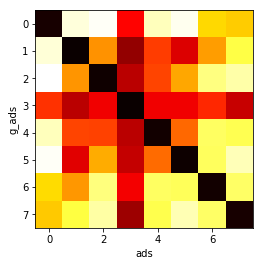

In [18]:
getMatchness(getMatchScoreExtended,ads,g_ads,1)